# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc_raw["munResLat"].describe()

,munResLat
count,27027.000000
mean,-10.377988
std,1.372942
min,-13.499760
25%,-11.433870
50%,-10.435950
75%,-8.768890
max,-8.768890


In [5]:
latitude = pd.cut(sinasc_raw["munResLat"],[-14,-10.5,-8])
latitude

,munResLat
0,"(-14.0, -10.5]"
1,"(-14.0, -10.5]"
2,"(-14.0, -10.5]"
3,"(-14.0, -10.5]"
4,"(-14.0, -10.5]"
...,...
27023,"(-14.0, -10.5]"
27024,"(-14.0, -10.5]"
27025,"(-14.0, -10.5]"
27026,"(-14.0, -10.5]"


In [6]:
list(sinasc_raw.columns)

['ORIGEM',
 'CODESTAB',
 'CODMUNNASC',
 'LOCNASC',
 'IDADEMAE',
 'ESTCIVMAE',
 'ESCMAE',
 'CODOCUPMAE',
 'QTDFILVIVO',
 'QTDFILMORT',
 'CODMUNRES',
 'GESTACAO',
 'GRAVIDEZ',
 'PARTO',
 'CONSULTAS',
 'DTNASC',
 'HORANASC',
 'SEXO',
 'APGAR1',
 'APGAR5',
 'RACACOR',
 'PESO',
 'IDANOMAL',
 'DTCADASTRO',
 'CODANOMAL',
 'NUMEROLOTE',
 'VERSAOSIST',
 'DTRECEBIM',
 'DIFDATA',
 'DTRECORIGA',
 'NATURALMAE',
 'CODMUNNATU',
 'CODUFNATU',
 'ESCMAE2010',
 'SERIESCMAE',
 'DTNASCMAE',
 'RACACORMAE',
 'QTDGESTANT',
 'QTDPARTNOR',
 'QTDPARTCES',
 'IDADEPAI',
 'DTULTMENST',
 'SEMAGESTAC',
 'TPMETESTIM',
 'CONSPRENAT',
 'MESPRENAT',
 'TPAPRESENT',
 'STTRABPART',
 'STCESPARTO',
 'TPNASCASSI',
 'TPFUNCRESP',
 'TPDOCRESP',
 'DTDECLARAC',
 'ESCMAEAGR1',
 'STDNEPIDEM',
 'STDNNOVA',
 'CODPAISRES',
 'TPROBSON',
 'PARIDADE',
 'KOTELCHUCK',
 'CONTADOR',
 'munResStatus',
 'munResTipo',
 'munResNome',
 'munResUf',
 'munResLat',
 'munResLon',
 'munResAlt',
 'munResArea']

In [7]:
sinasc_raw.pivot_table(values=["QTDGESTANT","QTDFILVIVO"],
                       index= [latitude,"RACACORMAE"],
                       aggfunc={
                           "QTDGESTANT":["min","max","mean","median"],
                           "QTDFILVIVO":["min","max","mean","median"]
                       })

<ipython-input-7-a3ff9d289e88>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_raw.pivot_table(values=["QTDGESTANT","QTDFILVIVO"],


QTDFILVIVO                       QTDGESTANT  \
                                 max      mean median  min        max   
munResLat      RACACORMAE                                               
(-14.0, -10.5] 1.0               6.0  0.845238    1.0  0.0        8.0   
               2.0               7.0  1.084711    1.0  0.0        8.0   
               3.0               4.0  0.894737    1.0  0.0        7.0   
               4.0              30.0  0.986727    1.0  0.0       15.0   
               5.0              12.0  1.915493    1.0  0.0       12.0   
(-10.5, -8.0]  1.0               7.0  0.896963    1.0  0.0        8.0   
               2.0               9.0  1.184971    1.0  0.0        9.0   
               3.0               5.0  0.865385    1.0  0.0        5.0   
               4.0              12.0  1.167639    1.0  0.0       52.0   
               5.0               8.0  2.078431    1.0  0.0       11.0   

                                                 
                               mean median  min  
munResLat      RACACORMAE                        
(-14.0, -10.5] 1.0         1.033728    1.0  0.0  
               2.0         1.327160    1.0  0.0  
               3.0         1.192982    1.0  0.0  
               4.0         1.201251    1.0  0.0  
               5.0         2.092958    1.0  0.0  
(-10.5, -8.0]  1.0         1.072509    1.0  0.0  
               2.0         1.461972    1.0  0.0  
               3.0         1.018868    1.0  0.0  
               4.0         1.413905    1.0  0.0  
               5.0         2.358491    1.0  0.0

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
sinasc_raw["munResArea"].describe()

,munResArea
count,27027.000000
mean,14702.799767
std,13706.177751
min,459.978000
25%,3792.998000
50%,6896.648000
75%,34096.394000
max,34096.394000


In [9]:
area_municipio = pd.cut(sinasc_raw["munResArea"],[0,3000,35000])
area_municipio.value_counts()

,count
munResArea,
"(3000, 35000]",21808
"(0, 3000]",5219


In [10]:
sinasc_raw.pivot_table(values=['CONSULTAS','PESO'],
                       index=['RACACORMAE',area_municipio],
                       aggfunc={
                           'CONSULTAS':['min','max','mean','median'],
                           'PESO':['min','max','mean','median']
                       })

<ipython-input-10-6e77cf2a5314>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_raw.pivot_table(values=['CONSULTAS','PESO'],


CONSULTAS                       PESO               \
                               max      mean median min   max         mean   
RACACORMAE munResArea                                                        
1.0        (0, 3000]             4  3.774571    4.0   1  5190  3252.639626   
           (3000, 35000]         9  3.663659    4.0   1  5065  3264.228780   
2.0        (0, 3000]             9  3.760563    4.0   2  4600  3222.896714   
           (3000, 35000]         9  3.654434    4.0   1  4875  3270.246177   
3.0        (0, 3000]             4  3.878049    4.0   3  4055  3235.951220   
           (3000, 35000]         4  3.640000    4.0   1  4850  3331.746667   
4.0        (0, 3000]             9  3.728588    4.0   1  5720  3205.082813   
           (3000, 35000]         9  3.521046    4.0   1  5985  3243.808344   
5.0        (0, 3000]             4  3.250000    3.5   2  3955  3648.750000   
           (3000, 35000]         9  3.036496    3.0   1  4846  3251.895377   

                                        
                          median   min  
RACACORMAE munResArea                   
1.0        (0, 3000]      3250.0   704  
           (3000, 35000]  3289.0   292  
2.0        (0, 3000]      3260.0  1400  
           (3000, 35000]  3270.0  1432  
3.0        (0, 3000]      3220.0  2415  
           (3000, 35000]  3300.0  2120  
4.0        (0, 3000]      3241.0   258  
           (3000, 35000]  3275.0   295  
5.0        (0, 3000]      3655.0  3330  
           (3000, 35000]  3260.0  1350

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [11]:
nova_variavel = pd.qcut(sinasc_raw["munResAlt"],2)
nova_variavel

,munResAlt
0,"(153.0, 595.0]"
1,"(153.0, 595.0]"
2,"(153.0, 595.0]"
3,"(153.0, 595.0]"
4,"(153.0, 595.0]"
...,...
27023,"(153.0, 595.0]"
27024,"(153.0, 595.0]"
27025,"(153.0, 595.0]"
27026,"(153.0, 595.0]"


In [12]:
sinasc_raw.pivot_table(values=['QTDGESTANT', 'QTDFILMORT'],
                       index=nova_variavel,
                       aggfunc={
                           'QTDGESTANT':['min','max','mean','median'],
                           'QTDFILMORT':['min','max','mean','median']
                       })

<ipython-input-12-74f992be4674>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sinasc_raw.pivot_table(values=['QTDGESTANT', 'QTDFILMORT'],


QTDFILMORT                       QTDGESTANT                   \
                       max      mean median  min        max      mean median   
munResAlt                                                                      
(84.999, 153.0]        9.0  0.300393    0.0  0.0       52.0  1.425738    1.0   
(153.0, 595.0]        28.0  0.236394    0.0  0.0       12.0  1.133564    1.0   

                      
                 min  
munResAlt             
(84.999, 153.0]  0.0  
(153.0, 595.0]   0.0

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [13]:
sinasc_1 = sinasc_raw.copy()

In [14]:
sinasc_1 = sinasc_1.set_index('munResNome')
sinasc_1.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,0,5,1,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,2,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,1,5,3,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alto Alegre dos Parecis,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,0,4,4,ATIVO,MUNIC,Rondônia,-12.13178,-61.85308,397.0,3958.273
Alta Floresta D'Oeste,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,5,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [17]:
sinasc_1.groupby(imediatas).count()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Ariquemes,3233,3219,3233,3233,3233,3180,3209,3094,2981,2769,...,3233,3233,3233,3233,3233,3233,3233,3233,3233,3233
Cacoal,4603,4595,4603,4603,4603,4568,4574,3870,4566,4553,...,4603,4603,4603,4603,4603,4603,4603,4603,4603,4603
Jaru,1683,1678,1683,1683,1683,1663,1668,1428,1659,1645,...,1683,1683,1683,1683,1683,1683,1683,1683,1683,1683
Ji-Paraná,4962,4954,4962,4962,4962,4895,4914,4540,4925,4911,...,4962,4962,4962,4962,4962,4962,4962,4962,4962,4962
Porto Velho,10096,10031,10096,10096,10096,9960,9913,8958,8886,8618,...,10096,10096,10096,10096,10096,10096,10096,10096,10096,10096
Vilhena,2450,2435,2450,2450,2450,2444,2437,2230,2437,2433,...,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450


In [16]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [18]:
resultado = sinasc_1.groupby(imediatas)['IDADEMAE'].mean()

<Axes: xlabel='munResNome'>

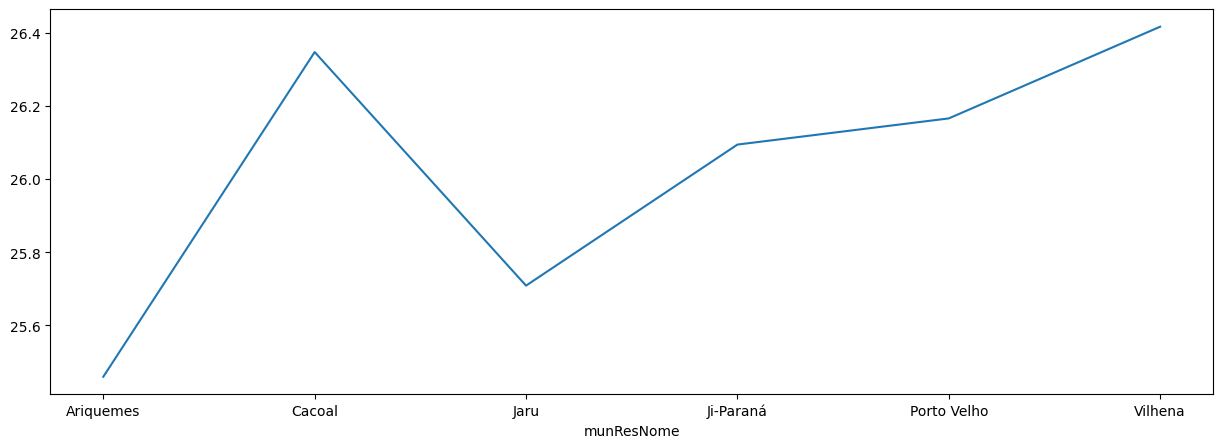

In [19]:
resultado.plot(figsize=(15,5))

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [20]:
idh={
    "Candeias do Jamari": "médio",
    "Guajará-Mirim": "médio",
    "Itapuã do Oeste": "médio",
    "Nova Mamoré": "baixo",
    "Porto Velho": "alto",
    "Ariquemes": "alto",
    "Alto Paraíso": "médio",
    "Buritis": "médio",
    "Cacaulândia": "médio",
    "Campo Novo de Rondônia": "baixo",
    "Cujubim": "médio",
    "Monte Negro": "médio",
    "Rio Crespo": "médio",
    "Jaru": "médio",
    "Governador Jorge Teixeira": "baixo",
    "Machadinho D'Oeste": "baixo",
    "Theobroma": "baixo",
    "Vale do Anari": "baixo",
    "Alvorada D'Oeste": "médio",
    "Costa Marques": "médio",
    "Ji-Paraná": "alto",
    "Mirante da Serra": "médio",
    "Nova União": "baixo",
    "Ouro Preto do Oeste": "médio",
    "Presidente Médici": "médio",
    "São Francisco do Guaporé": "médio",
    "São Miguel do Guaporé": "médio",
    "Seringueiras": "baixo",
    "Teixeirópolis": "médio",
    "Urupá": "médio",
    "Vale do Paraíso": "médio",
    "Cacoal": "alto",
    "Alta Floresta D'Oeste": "médio",
    "Alto Alegre dos Parecis": "baixo",
    "Castanheiras": "médio",
    "Espigão D'Oeste": "médio",
    "Ministro Andreazza": "médio",
    "Nova Brasilândia D'Oeste": "médio",
    "Novo Horizonte do Oeste": "médio",
    "Parecis": "médio",
    "Pimenta Bueno": "alto",
    "Primavera de Rondônia": "médio",
    "Rolim de Moura": "alto",
    "Santa Luzia D'Oeste": "médio",
    "São Felipe D'Oeste": "médio",
    "Vilhena": "alto",
    "Cabixi": "médio",
    "Cerejeiras": "médio",
    "Chupinguaia": "médio",
    "Colorado do Oeste": "médio",
    "Corumbiara": "médio",
    "Pimenteiras do Oeste": "médio"
}

In [21]:
agrupamento = sinasc_1[['QTDFILMORT','CONSULTAS']]
agrupamento

,QTDFILMORT,CONSULTAS
munResNome,,
Alta Floresta D'Oeste,0.0,4
Alta Floresta D'Oeste,0.0,4
Alta Floresta D'Oeste,0.0,4
Alto Alegre dos Parecis,0.0,3
Alta Floresta D'Oeste,0.0,4
...,...,...
Vilhena,0.0,4
Chupinguaia,0.0,4
Vilhena,1.0,4


In [22]:
agrupamento.groupby(idh).count()

,QTDFILMORT,CONSULTAS
munResNome,,
alto,15428,16855
baixo,1684,1826
médio,7817,8346


In [23]:
sinasc_2 = agrupamento.groupby(idh).mean()
sinasc_2

,QTDFILMORT,CONSULTAS
munResNome,,
alto,0.272297,3.526372
baixo,0.249406,3.641292
médio,0.258667,3.663551


<Axes: xlabel='munResNome'>

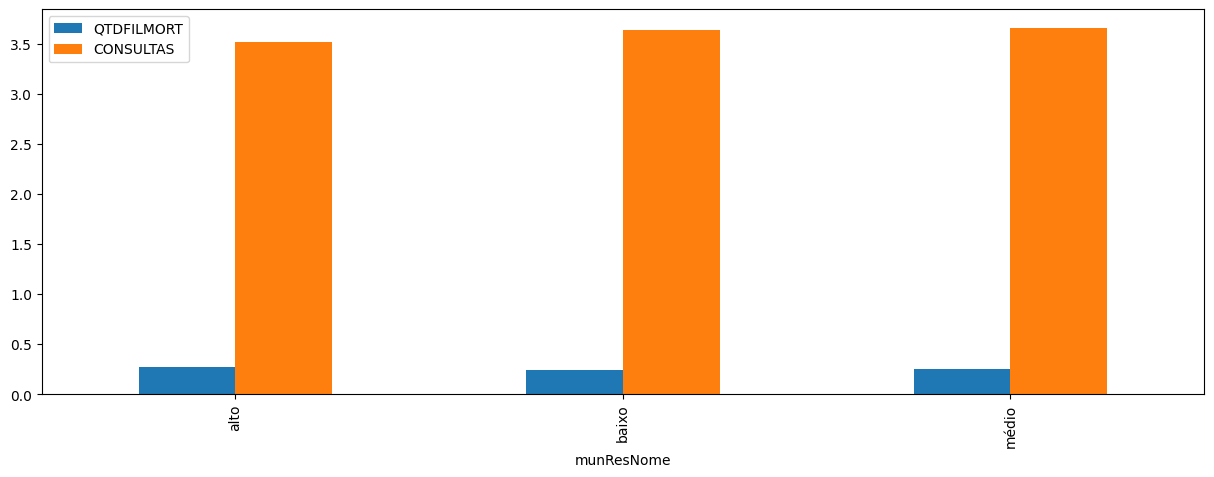

In [26]:
sinasc_2.plot(kind= 'bar', figsize=(15,5))

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [28]:
ifdm={
    "Candeias do Jamari": "moderado",
    "Guajará-Mirim": "regular",
    "Itapuã do Oeste": "regular",
    "Nova Mamoré": "regular",
    "Porto Velho": "moderado",
    "Ariquemes": "moderado",
    "Alto Paraíso": "regular",
    "Buritis": "moderado",
    "Cacaulândia": "regular",
    "Campo Novo de Rondônia": "regular",
    "Cujubim": "regular",
    "Monte Negro": "moderado",
    "Rio Crespo": "moderado",
    "Jaru": "moderado",
    "Governador Jorge Teixeira": "regular",
    "Machadinho D'Oeste": "regular",
    "Theobroma": "regular",
    "Vale do Anari": "regular",
    "Alvorada D'Oeste": "regular",
    "Costa Marques": "regular",
    "Ji-Paraná": "moderado",
    "Mirante da Serra": "regular",
    "Nova União": "regular",
    "Ouro Preto do Oeste": "regular",
    "Presidente Médici": "moderado",
    "São Francisco do Guaporé": "moderado",
    "São Miguel do Guaporé": "moderado",
    "Seringueiras": "regular",
    "Teixeirópolis": "moderado",
    "Urupá": "moderado",
    "Vale do Paraíso": "regular",
    "Cacoal": "moderado",
    "Alta Floresta D'Oeste": "moderado",
    "Alto Alegre dos Parecis": "regular",
    "Castanheiras": "regular",
    "Espigão D'Oeste": "regular",
    "Ministro Andreazza": "regular",
    "Nova Brasilândia D'Oeste": "regular",
    "Novo Horizonte do Oeste": "regular",
    "Parecis": "regular",
    "Pimenta Bueno": "moderado",
    "Primavera de Rondônia": "moderado",
    "Rolim de Moura": "moderado",
    "Santa Luzia D'Oeste": "moderado",
    "São Felipe D'Oeste": "moderado",
    "Vilhena": "moderado",
    "Cabixi": "regular",
    "Cerejeiras": "moderado",
    "Chupinguaia": "moderado",
    "Colorado do Oeste": "moderado",
    "Corumbiara": "regular",
    "Pimenteiras do Oeste": "moderado"
}

In [30]:
avaliação_2 = sinasc_1[['QTDFILVIVO','PESO']]
avaliação_2

,QTDFILVIVO,PESO
munResNome,,
Alta Floresta D'Oeste,0.0,3685
Alta Floresta D'Oeste,1.0,3055
Alta Floresta D'Oeste,2.0,3460
Alto Alegre dos Parecis,0.0,2982
Alta Floresta D'Oeste,1.0,3310
...,...,...
Vilhena,1.0,2110
Chupinguaia,0.0,3310
Vilhena,0.0,3065


In [49]:
avaliação_2.groupby(ifdm).mean()

,QTDFILVIVO,PESO
munResNome,,
moderado,1.031325,3243.911518
regular,1.134567,3240.505602


<Axes: xlabel='munResNome'>

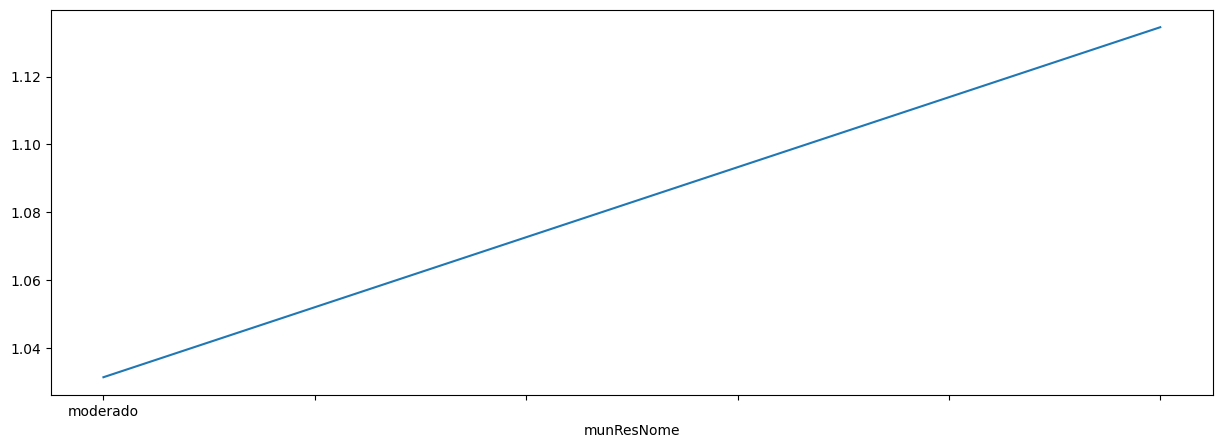

In [48]:
comparacao = avaliação_2.groupby(ifdm)['QTDFILVIVO'].mean()
comparacao.plot(figsize=(15,5))

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [50]:
pib={
    "Candeias do Jamari": "500M",
    "Guajará-Mirim": "500M",
    "Itapuã do Oeste": "AC100",
    "Nova Mamoré": "500M",
    "Porto Velho": "1B",
    "Ariquemes": "1B",
    "Alto Paraíso": "300M",
    "Buritis": "500M",
    "Cacaulândia": "AC100",
    "Campo Novo de Rondônia": "200M",
    "Cujubim": "300M",
    "Monte Negro": "200M",
    "Rio Crespo": "AB100",
    "Jaru": "1B",
    "Governador Jorge Teixeira": "AC100",
    "Machadinho D'Oeste": "500M",
    "Theobroma": "AC100",
    "Vale do Anari": "AC100",
    "Alvorada D'Oeste": "200M",
    "Costa Marques": "AC100",
    "Ji-Paraná": "1B",
    "Mirante da Serra": "AC100",
    "Nova União": "AB100",
    "Ouro Preto do Oeste": "500M",
    "Presidente Médici": "300M",
    "São Francisco do Guaporé": "300M",
    "São Miguel do Guaporé": "500M",
    "Seringueiras": "AC100",
    "Teixeirópolis": "AB100",
    "Urupá": "AC100",
    "Vale do Paraíso": "AC100",
    "Cacoal": "1B",
    "Alta Floresta D'Oeste": "300M",
    "Alto Alegre dos Parecis": "200M",
    "Castanheiras": "AB100",
    "Espigão D'Oeste": "AC100",
    "Ministro Andreazza": "AC100",
    "Nova Brasilândia D'Oeste": "300M",
    "Novo Horizonte do Oeste": "AC100",
    "Parecis": "AB100",
    "Pimenta Bueno": "1B",
    "Primavera de Rondônia": "AB100",
    "Rolim de Moura": "1B",
    "Santa Luzia D'Oeste": "AC100",
    "São Felipe D'Oeste": "AB100",
    "Vilhena": "1B",
    "Cabixi": "AC100",
    "Cerejeiras": "500M",
    "Chupinguaia": "AC100",
    "Colorado do Oeste": "300M",
    "Corumbiara": "AC100",
    "Pimenteiras do Oeste": "AB100"
}

In [51]:
comparacao_3 = sinasc_1[['PESO','QTDFILMORT']]
comparacao_3

,PESO,QTDFILMORT
munResNome,,
Alta Floresta D'Oeste,3685,0.0
Alta Floresta D'Oeste,3055,0.0
Alta Floresta D'Oeste,3460,0.0
Alto Alegre dos Parecis,2982,0.0
Alta Floresta D'Oeste,3310,0.0
...,...,...
Vilhena,2110,0.0
Chupinguaia,3310,0.0
Vilhena,3065,1.0


In [54]:
comparacao_3.groupby(pib).mean()

,PESO,QTDFILMORT
munResNome,,
1B,3247.215719,0.270229
200M,3231.439227,0.238829
300M,3225.818617,0.233261
500M,3237.372600,0.308406
AB100,3186.264501,0.162736
AC100,3250.170275,0.233475


<Axes: xlabel='munResNome'>

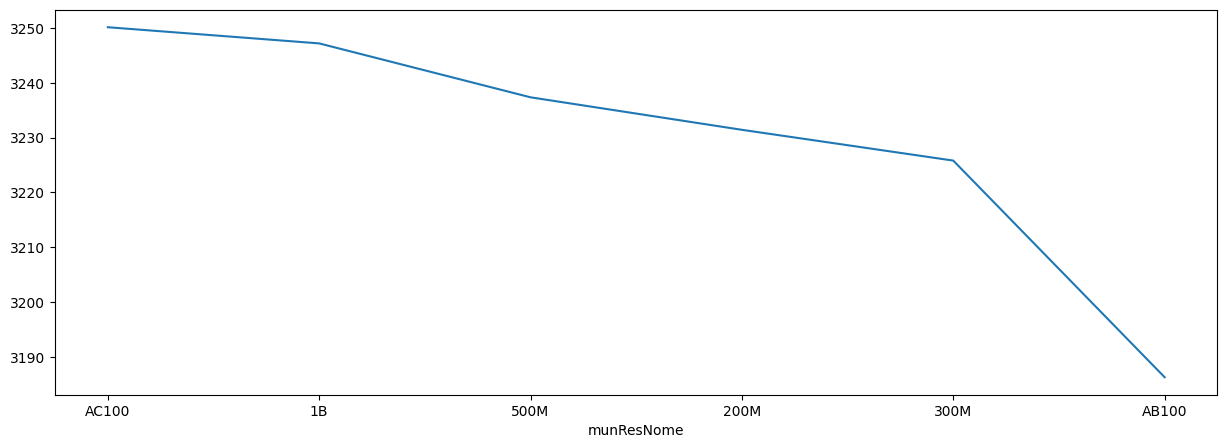

In [60]:
grafico = comparacao_3.groupby(pib)['PESO'].mean().sort_values(ascending=False)
grafico.plot(figsize=(15,5))

<Axes: xlabel='munResNome'>

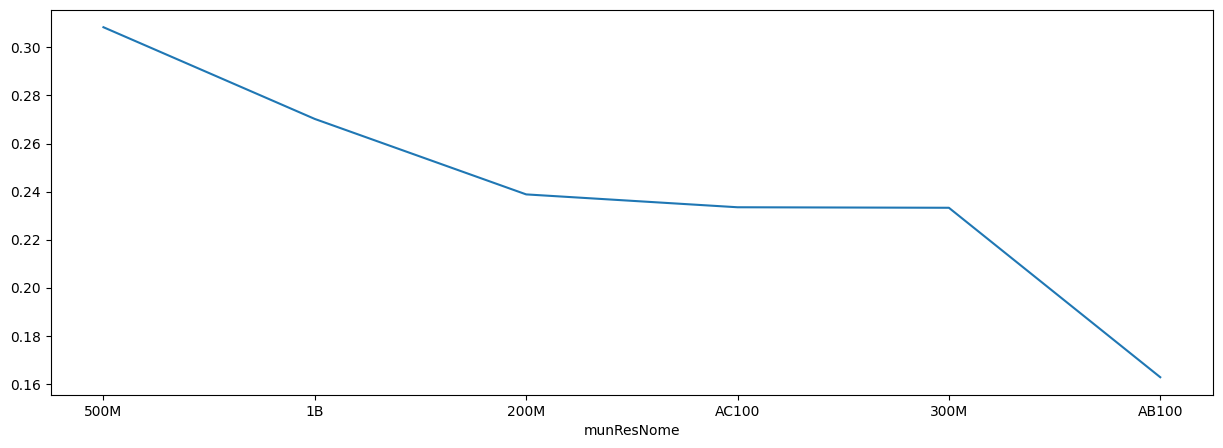

In [61]:
grafico = comparacao_3.groupby(pib)['QTDFILMORT'].mean().sort_values(ascending=False)
grafico.plot(figsize=(15,5))

In [67]:
comparacao_4 = sinasc_1[['IDADEMAE','CONSULTAS']]
comparacao_4

,IDADEMAE,CONSULTAS
munResNome,,
Alta Floresta D'Oeste,19,4
Alta Floresta D'Oeste,29,4
Alta Floresta D'Oeste,37,4
Alto Alegre dos Parecis,30,3
Alta Floresta D'Oeste,30,4
...,...,...
Vilhena,32,4
Chupinguaia,19,4
Vilhena,24,4


In [68]:
checagem = comparacao_4.groupby(pib).mean()
checagem

,IDADEMAE,CONSULTAS
munResNome,,
1B,26.265562,3.541103
200M,25.323204,3.671271
300M,25.833511,3.722872
500M,25.746238,3.543851
AB100,26.515081,3.719258
AC100,25.743547,3.721482


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

RESPOSTAS:

* Descobri que quanto maior o IDH ou PIB da cidade, o número de consultas é menor, minha teoria é que provavelmente isso se deve as melhores condições financeiras, acarretando em acompanhamentos pelo sistema de saúde privado.

* Outro ponto notado é que o PIB aparentemente interfere no peso das crianças, onde cidades com PIB mais alto tendem a ter mães com crianças em pesos maiores.


* Com índices melhores de desenvolvimento, seja ele municipal ou regional, as taxas de filhos vivos aumentam junto.
